### Logistic regression to predict survival on titanic

In [576]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [577]:
df= pd.read_csv('train.csv')

In [578]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

#### Selecting features

In [579]:
X=pd.DataFrame()
X['pclass']= df['Pclass']
X['sex']= df['Sex']
X['age']= df['Age']
X['fare']= df['Fare']
X['emb']= df['Embarked']
X['sur']= df['Survived']

In [580]:
print X.age.isnull().value_counts() 
print X.emb.isnull().value_counts()


False    714
True     177
dtype: int64
False    889
True       2
dtype: int64


#### Filling missing values in Age

In [581]:
X.age= X.age.interpolate()

In [582]:
print X.age.isnull().value_counts() 

False    891
dtype: int64


In [583]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
pclass    891 non-null int64
sex       891 non-null object
age       891 non-null float64
fare      891 non-null float64
emb       889 non-null object
sur       891 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 48.7+ KB


#### Dropping 2 rows with missing emb values

In [584]:
X=X.dropna(axis=0)

In [585]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
pclass    889 non-null int64
sex       889 non-null object
age       889 non-null float64
fare      889 non-null float64
emb       889 non-null object
sur       889 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 48.6+ KB


In [586]:
y= X['sur']
X= X.drop(['sur'], axis=1)

In [587]:
a= pd.get_dummies(X.pclass, prefix= 'pclass')
b= pd.get_dummies(X.sex, prefix= 'sex')
c =pd.get_dummies(X.emb, prefix= 'emb')

In [588]:
dummies= pd.concat((a,b,c), axis=1)

In [589]:
dummies.head(3)

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,emb_C,emb_Q,emb_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1


In [590]:
X= pd.concat((X,dummies), axis=1)

In [591]:
X.head(3)

,pclass,sex,age,fare,emb,pclass_1,pclass_2,pclass_3,sex_female,sex_male,emb_C,emb_Q,emb_S
0,3,male,22,7.2500,S,0,0,1,0,1,0,0,1
1,1,female,38,71.2833,C,1,0,0,1,0,1,0,0
2,3,female,26,7.9250,S,0,0,1,1,0,0,0,1


#### Removing pclass, sex and emb column

In [592]:
X= X.drop(['pclass','sex','emb'], axis=1)

In [593]:
X.head(5)

,age,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,emb_C,emb_Q,emb_S
0,22,7.2500,0,0,1,0,1,0,0,1
1,38,71.2833,1,0,0,1,0,1,0,0
2,26,7.9250,0,0,1,1,0,0,0,1
3,35,53.1000,1,0,0,1,0,0,0,1
4,35,8.0500,0,0,1,0,1,0,0,1


In [594]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [595]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=168)

In [596]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [597]:
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [598]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.82


In [599]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [600]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )

Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.84      0.87      0.85       108
          1       0.79      0.74      0.76        70

avg / total       0.82      0.82      0.82       178



In [601]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

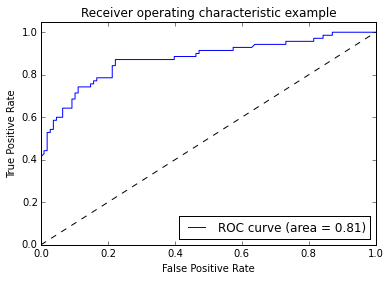

In [602]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()